In [1]:
module O

using Plots

struct Wireframe{F, X, Y}
    f::F
    x::X
    y::Y
end

vecwithnan(X) = [
    vec([X ; fill(NaN, 1, size(X,  2))])
    vec([X'; fill(NaN, 1, size(X', 2))])
]

@recipe function f(wf::Wireframe)
    f, x, y = wf.f, wf.x, wf.y
    X, Y = reim(complex.(x', y))
    XX, YY = vecwithnan(X), vecwithnan(Y)
    ZZ = f.(XX, YY)
    XX, YY, ZZ
end

@recipe function f(wf::Wireframe{<:AbstractMatrix})
    Z, x, y = wf.f, wf.x, wf.y
    X, Y = reim(complex.(x', y))
    XX, YY, ZZ = vecwithnan(X), vecwithnan(Y), vecwithnan(Z)
    XX, YY, ZZ
end

end

Main.O

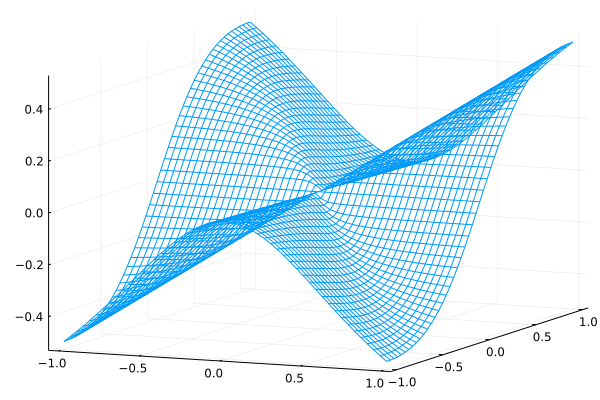

In [2]:
using Plots
x = y = range(-1, 1, 51)
f(x, y) = x == y == 0 ? zero(x) : x^2*y/(x^2 + y^2)
plot(O.Wireframe(f, x, y); label="")

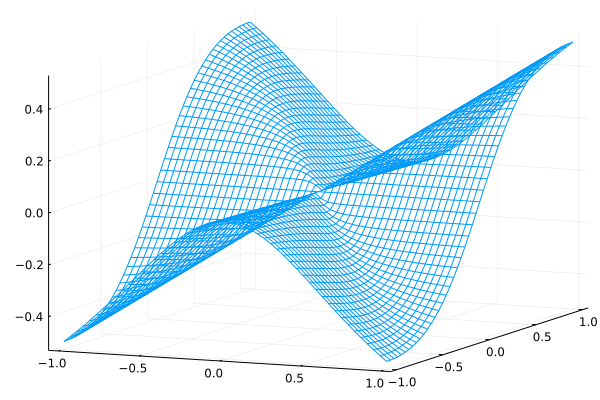

In [3]:
Z = f.(x', y)
plot(O.Wireframe(Z, x, y); label="")

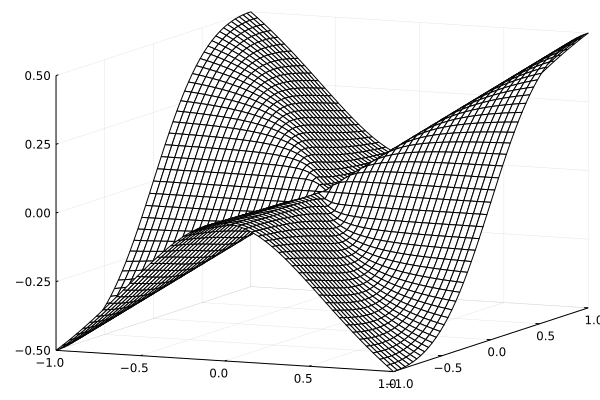

In [4]:
wireframe(x, y, f)